# Project 3: Web APIs and NLP
_By: Kelly Wu (NYC - Tensors)_

## Problem Statement
After a huge success from releaseing Mario Kart Tour, Nintendo is about to release another interation of Mario Kart and wants to utilize their social media presence to create buzz. The marketing department has come up with the use of a hashtag! However, the office has become split about what hashtag to use. Some say to just use "Mario Kart" because it's known, some are arguing that "Mario Kart" too general for this new release, others are just throwing random words to spice things up like "Luigi Kart," "Mushroom Race," and "Mario Drive." With a divided office, they managed to all agree on one thing: hire an analyst to help them decide. What word should be the marketing hashtag for the upcoming Mario Kart? 

## Executive Summary
We begin our process by going to the home of topic conversations: Reddit. There we decided to choose two popular Mario game subreddits: Mario Kart and Smash Bros Ultimate. From those two subreddits, we began by gathering our data through webscraping via 10 request pulls and converting all our findings into a nice data frame to work with in our analysis (which can be found in a separate notebook in the code folder). Afterwards, we saved and exportd our nicely converted data to be imported into a new notebook to begin a cleaning and exploratory data analysis to fix any immediately noticeable values that wouldn't be beneficial to us. 

Here we searched for any outliers and null values that we decided to drop from our dataset as they were only a minute number of rows in our overall collected data. In the end, we had abotu 1850 rows from the Mario Kart subreddit and 1450 rows from the Smash Bros Ultimate subreddit. Next we decided to focus on the titles as we figured that you always get grabbed by a title before actually reading the content. So we dived into lemmatizing-to pull root words from the title words- and count vectorizing to determine the frequency of certain words-single words and consecutive pair words. Afterwards, we looked at the frequency with consideration of an existing set of English stop words to reduce any "noise" (as we don't want common words like "the" or "a" showing up on our list). 

After discovering our potential hashtag words, we went on to a modeling process to see if we could find the best model in prediciting whether it can classify certain titles into the correct subreddit. Our goal here is that we want don't want to select a hashtag that is too ambiguous and won't have an immediate recognition to Mario Kart. Therefore, we have our second subreddit, which is slightly similar, to see how accurate our potential hashtag may be in representing the upcoming Mario Kart and not being confused for Smash Bros Ultimate. Through modeling we explore Naive Bayes and Classifier models and play with some of the hyperparameters to tune and find the best model and come to our conclusion.


## Contents
- [Imports](#Imports)
    - [Import Libraries](#Import-Libraries)
    - [Import Cleaned Data](#Import-Cleaned-Data)
- [Exploratory Data Analysis and Preprocessing](#Exploratory-Data-Analysis-and-Preprocessing)
    - [Outliers and Null Values](#Outliers-and-Null-Values)
    - [Lemmatizing](#Lemmatizing)
    - [Count Vectorizer](#Count-Vectorizer)
        - [Frequency of Single Gram via Count Vectorizer](#Frequency-of-Single-Gram-via-Count-Vectorizer)
        - [Frequency of Bigrams via Count Vectorizer](#Frequency-of-Bigrams-via-Count-Vectorizer)
    - [Stop Words](#Stop-Words)
        - [Single Gram](#Single-Gram)
        - [Bigram](#Bigram)
    - [Visualizations](#Visualizations)
- [Modeling](#Modeling)
    - [Combining Data Frames](#Combining-Data-Frames)
    - [Creating Our Variables](#Creating-Our-Variables)
    - [Baseline](#Baseline)
    - [Naive Bayes](#Naive-Bayes)
    - [Bernoulli Naive Bayes](#Bernoulli-Naive-Bayes)
        - [Bernoulli NB Confusion Matrix](#Bernoulli-NB-Confusion-Matrix)
    - [Multinomial Naive Bayes](#Multinomial-Naive-Bayes)
        - [Multinomial NB Confusion Matrix](#Multinomial-NB-Confusion-Matrix)
    - [Classifiers](#Classifiers)
        - [Logistic Regression](#Logistic-Regression)
            - [Logistic Regression Confusion Matrix](#Logisitic-Regression-Confusion-Matrix)
        - [AdaBoost](#AdaBoost)
            - [AdaBoost Confusion Matrix](#AdaBoost-Confusion-Matrix)
    - [Determining Our Best Model](#Determining-Our-Best-Model)
        - [Comparing Model Scores](#Comparing-Model-Scores)
        - [Comparing Model Confusion Matrices](#Comparing-Model-Confusion-Matrices)
- [Outside Research](#Outside-Research)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

### Imports

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

#### Import Cleaned Data

In [2]:
mario_kart = pd.read_csv('../datasets/mariokart.csv')
smash = pd.read_csv('../datasets/smashultimate.csv')

### Exploratory Data Analysis and Preprocessing

#### Outliers and Null Values

In [3]:
mario_kart.isna().sum()

title         0
selftext     99
subreddit     0
dtype: int64

In [4]:
smash.isna().sum()

title         0
selftext     24
subreddit     0
dtype: int64

In [5]:
print(mario_kart.shape)
print(smash.shape)

(1857, 3)
(1453, 3)


In [6]:
mario_kart['title'].sort_values()

851     "The Inserted SD card does not contain CTGP-R....
768     (4th of 4 surveys) How does esports improve th...
1673    (Hyduken) Super MarioKart Hyper street kart 20...
150     (I know Nintendo is Hosting a Tournament at th...
149     (I know Nintendo is Hosting a tournament atm o...
                              ...                        
1681    {Hyduken} Super Mario Kart Hyper Street Kart 2...
313                           {MK7] Tips for Time Trials.
1808                       {MKWii} ctww wont load on ctgp
1103                        “Fire Hopping” and “Snaking”?
1157                                                    🐕
Name: title, Length: 1857, dtype: object

In [7]:
mario_kart.drop(index = 1157, inplace = True)

In [8]:
mario_kart['title'].sort_values()

851     "The Inserted SD card does not contain CTGP-R....
768     (4th of 4 surveys) How does esports improve th...
1673    (Hyduken) Super MarioKart Hyper street kart 20...
150     (I know Nintendo is Hosting a Tournament at th...
149     (I know Nintendo is Hosting a tournament atm o...
                              ...                        
98                                   who are your mains ?
1681    {Hyduken} Super Mario Kart Hyper Street Kart 2...
313                           {MK7] Tips for Time Trials.
1808                       {MKWii} ctww wont load on ctgp
1103                        “Fire Hopping” and “Snaking”?
Name: title, Length: 1856, dtype: object

In [9]:
# https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
mario_kart = mario_kart.reset_index(drop = True)

In [10]:
mario_kart.shape

(1856, 3)

In [11]:
smash['title'].sort_values()

1288                            "COB" tourney in Seattle?
1329                                    "Heart" codename?
818                          "Overwriting" enemy attacks?
204        "Phantom" - Me, Colored Pens and Pencils, 2019
878                                       #SUPPORT BOCCHI
                              ...                        
575     whats the best spirit team for the spirit tour...
955     why do I get punished for playing against poor...
169                      why do I want Lego yoda in smash
476                           world of light final battle
303                         “Unsporting Behavior” Venting
Name: title, Length: 1453, dtype: object

In [12]:
mario_kart.describe().T

,count,unique,top,freq
title,1856,1856,Is it possible to hit a banana in Mario Kart 6...,1
selftext,1757,1053,[removed],679
subreddit,1856,1,mariokart,1856


In [13]:
smash.describe().T

,count,unique,top,freq
title,1453,1453,Who else votes for their main whenever they se...,1
selftext,1429,1303,[removed],117
subreddit,1453,1,SmashBrosUltimate,1453


#### Lemmatizing

In [14]:
def lemmatize(column): 
    # Instantiate tokenizer
    tokenizer = RegexpTokenizer(r'[A-z]+')
    # Tokenize text
    tokens = [tokenizer.tokenize(text.lower()) for text in column]
    
    # Instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens_lem = []
   
    # Lemmatize tokens
    for words in tokens:
        lem_list = [lemmatizer.lemmatize(i) for i in words]
        lem_post = ''
        for word in lem_list:
            lem_post += (word+' ')
        tokens_lem.append(lem_post.strip())
    
    return tokens_lem

In [15]:
mario_kart_lem = lemmatize(mario_kart['title'])
smash_lem = lemmatize(smash['title'])

#### Count Vectorizer

In [16]:
cvec = CountVectorizer()

In [17]:
mario_kart_features = cvec.fit_transform(mario_kart_lem)
smash_features = cvec.fit_transform(smash_lem)

#### Frequency of Single Gram via Count Vectorizer

In [18]:
# Worked with Despina

def single_words(data, column):
    cvec = CountVectorizer(ngram_range = (1,1))
    cvec_df = pd.DataFrame(cvec.fit_transform(data[column]).toarray(),
                           columns = cvec.get_feature_names())
    counts = cvec_df.sum().sort_values(ascending = False)
    return counts

In [19]:
single_words(mario_kart, 'title')

kart      652
mario     625
the       525
to        360
mk8dx     347
         ... 
house       1
hows        1
humor       1
hump        1
genius      1
Length: 2313, dtype: int64

In [20]:
single_words(smash, 'title')

the           329
to            299
smash         220
is            200
you           176
             ... 
hi              1
salinas         1
highlights      1
hilarious       1
zss             1
Length: 2344, dtype: int64

#### Frequency of Bigrams via Count Vectorizer

In [21]:
# Worked with Despina 

def double_words(data, column):
    cvec = CountVectorizer(ngram_range = (2, 2))
    cvec_df = pd.DataFrame(cvec.fit_transform(data[column]).toarray(),
                           columns = cvec.get_feature_names())
    counts = cvec_df.sum().sort_values(ascending = False)
    return counts

In [22]:
double_words(mario_kart, 'title')

mario kart        592
kart tour          75
kart deluxe        74
do you             58
mk elimination     46
                 ... 
on awful            1
on beating          1
on caffeine         1
on ctgp             1
mk7 any             1
Length: 8329, dtype: int64

In [23]:
double_words(smash, 'title')

do you               61
how do               37
in smash             36
smash ultimate       32
the game             31
                     ..
plant counterplay     1
plant paid            1
plant paradox         1
platforms to          1
makes it              1
Length: 7216, dtype: int64

#### Stop Words

#### Single Gram

In [24]:
# Worked with Despina

def stop_words_single(data, column):
    cvec = CountVectorizer(stop_words = 'english', ngram_range = (1, 1))
    cvec_df = pd.DataFrame(cvec.fit_transform(data[column]).toarray(),
                           columns = cvec.get_feature_names())
    
    counts = cvec_df.sum().sort_values(ascending = False)
    return counts

In [25]:
stop_words_single(mario_kart, 'title')

kart      652
mario     625
mk8dx     347
mk        226
mkt       184
         ... 
stare       1
host        1
hosted      1
hour        1
liked       1
Length: 2112, dtype: int64

In [26]:
stop_words_single(smash, 'title')

smash        220
online        96
game          86
character     85
dlc           71
            ... 
oblivion       1
obscure        1
occasion       1
occur          1
locations      1
Length: 2147, dtype: int64

#### Bigram

In [27]:
# Worked with Despina

def stop_words_double(data, column):
    cvec = CountVectorizer(stop_words = 'english', ngram_range = (2, 2))
    cvec_df = pd.DataFrame(cvec.fit_transform(data[column]).toarray(),
                           columns = cvec.get_feature_names())
    
    counts = cvec_df.sum().sort_values(ascending = False)
    return counts

In [28]:
stop_words_double(mario_kart, 'title')

mario kart        593
kart tour          75
kart deluxe        74
mk elimination     46
kart wii           33
                 ... 
music remixes       1
music smk           1
music track         1
music want          1
mk crash            1
Length: 5611, dtype: int64

In [29]:
stop_words_double(smash, 'title')

smash ultimate    33
smash bros        29
elite smash       21
need help         18
super smash       16
                  ..
option switch      1
option start       1
option make        1
option choose      1
zss neutral        1
Length: 4374, dtype: int64

#### Visualizations

Text(0, 0.5, 'Words')

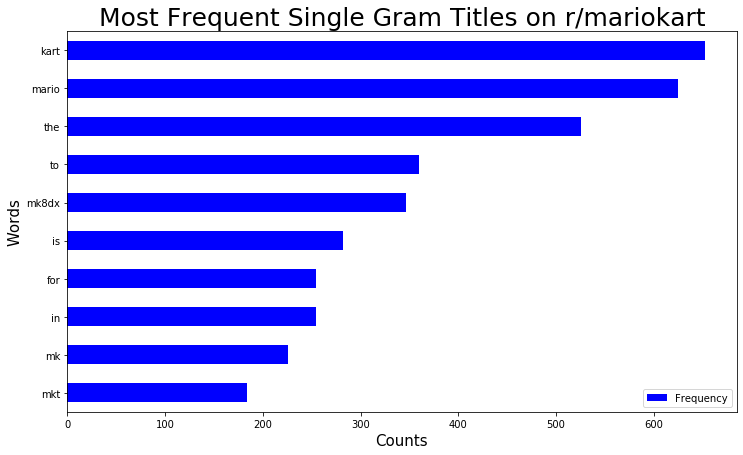

In [30]:
mario_kart_single_frequency = pd.DataFrame(data = single_words(mario_kart, 'title'), 
                                           columns = ['Frequency'])

top_10_single = mario_kart_single_frequency.head(10)

top_10_single.sort_values(by = 'Frequency', ascending = True).plot(kind = 'barh', 
                                                                  color = 'blue', 
                                                                  figsize = (12,7))

plt.title('Most Frequent Single Gram Titles on r/mariokart',size = 25)
plt.xlabel('Counts', size = 15)
plt.ylabel('Words', size = 15)

Text(0, 0.5, 'Words')

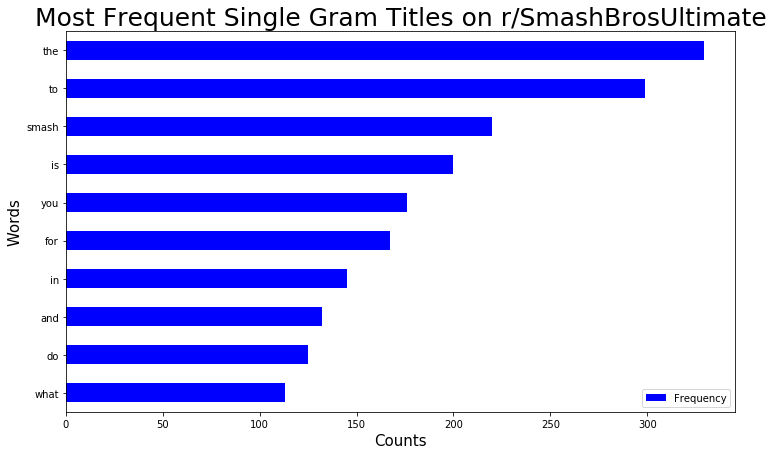

In [31]:
smash_single_frequency = pd.DataFrame(data = single_words(smash, 'title'), 
                                         columns = ['Frequency'])

top_10_single = smash_single_frequency.head(10)

top_10_single.sort_values(by = 'Frequency', ascending = True).plot(kind = 'barh', 
                                                                  color = 'blue', 
                                                                  figsize = (12,7))

plt.title('Most Frequent Single Gram Titles on r/SmashBrosUltimate',size = 25)
plt.xlabel('Counts', size = 15)
plt.ylabel('Words', size = 15)

Text(0, 0.5, 'Words')

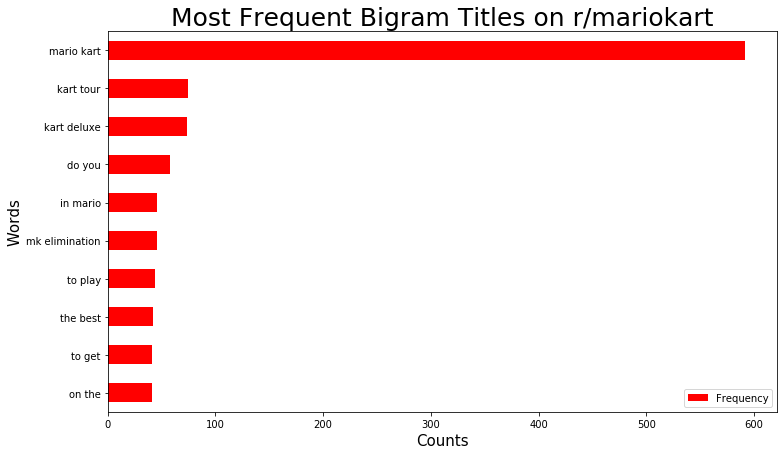

In [32]:
mario_kart_double_frequency = pd.DataFrame(data = double_words(mario_kart, 'title'), 
                                         columns = ['Frequency'])

top_10_double = mario_kart_double_frequency.head(10)

top_10_double.sort_values(by = 'Frequency', ascending = True).plot(kind = 'barh', 
                                                                  color = 'red', 
                                                                  figsize = (12,7))

plt.title('Most Frequent Bigram Titles on r/mariokart',size = 25)
plt.xlabel('Counts', size = 15)
plt.ylabel('Words', size = 15)


Text(0, 0.5, 'Words')

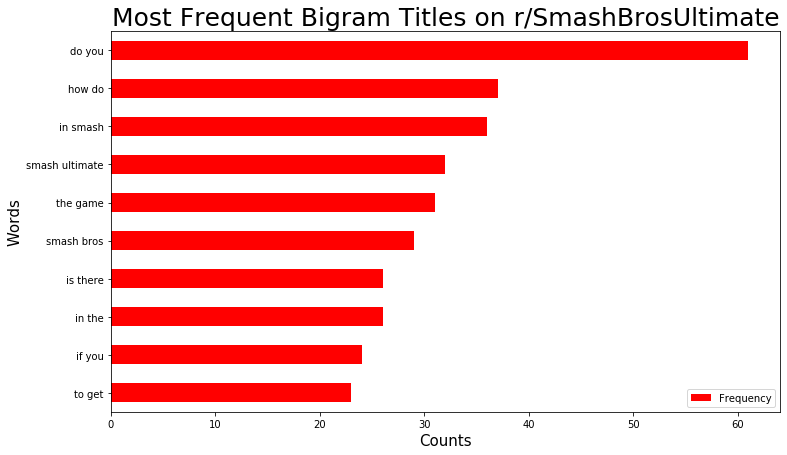

In [33]:
smash_double_frequency = pd.DataFrame(data = double_words(smash, 'title'), 
                                         columns = ['Frequency'])

top_10_double = smash_double_frequency.head(10)

top_10_double.sort_values(by = 'Frequency', ascending = True).plot(kind = 'barh', 
                                                                  color = 'red', 
                                                                  figsize = (12,7))

plt.title('Most Frequent Bigram Titles on r/SmashBrosUltimate',size = 25)
plt.xlabel('Counts', size = 15)
plt.ylabel('Words', size = 15)

Text(0, 0.5, 'Words')

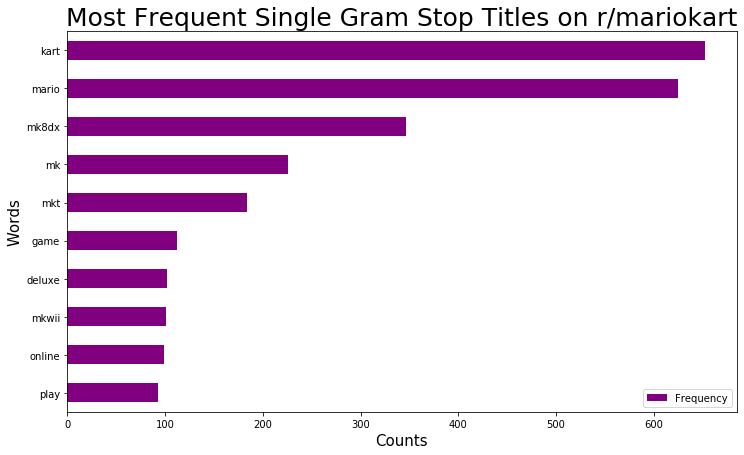

In [34]:
mario_kart_stop_frequency = pd.DataFrame(data = stop_words_single(mario_kart, 'title'), 
                                         columns = ['Frequency'])

top_10_stop = mario_kart_stop_frequency.head(10)

top_10_stop.sort_values(by = 'Frequency', ascending = True).plot(kind = 'barh', 
                                                                  color = 'purple', 
                                                                  figsize = (12,7))

plt.title('Most Frequent Single Gram Stop Titles on r/mariokart',size = 25)
plt.xlabel('Counts', size = 15)
plt.ylabel('Words', size = 15)

Text(0, 0.5, 'Words')

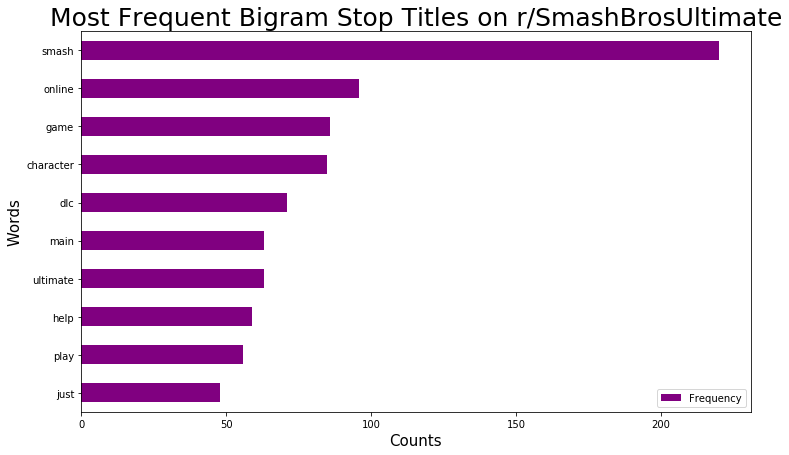

In [35]:
smash_stop_frequency = pd.DataFrame(data = stop_words_single(smash, 'title'), 
                                         columns = ['Frequency'])

top_10_stop = smash_stop_frequency.head(10)

top_10_stop.sort_values(by = 'Frequency', ascending = True).plot(kind = 'barh', 
                                                                  color = 'purple', 
                                                                  figsize = (12,7))

plt.title('Most Frequent Single Gram Stop Titles on r/SmashBrosUltimate',size = 25)
plt.xlabel('Counts', size = 15)
plt.ylabel('Words', size = 15)

Text(0, 0.5, 'Words')

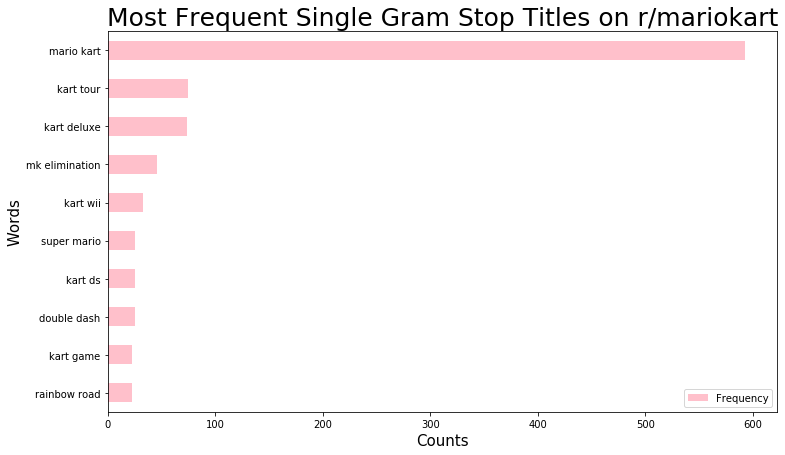

In [36]:
mario_kart_stop_2_frequency = pd.DataFrame(data = stop_words_double(mario_kart, 'title'), 
                                         columns = ['Frequency'])

top_10_stop = mario_kart_stop_2_frequency.head(10)

top_10_stop.sort_values(by = 'Frequency', ascending = True).plot(kind = 'barh', 
                                                                  color = 'pink', 
                                                                  figsize = (12,7))

plt.title('Most Frequent Bigram Stop Titles on r/mariokart',size = 25)
plt.xlabel('Counts', size = 15)
plt.ylabel('Words', size = 15)

Text(0, 0.5, 'Words')

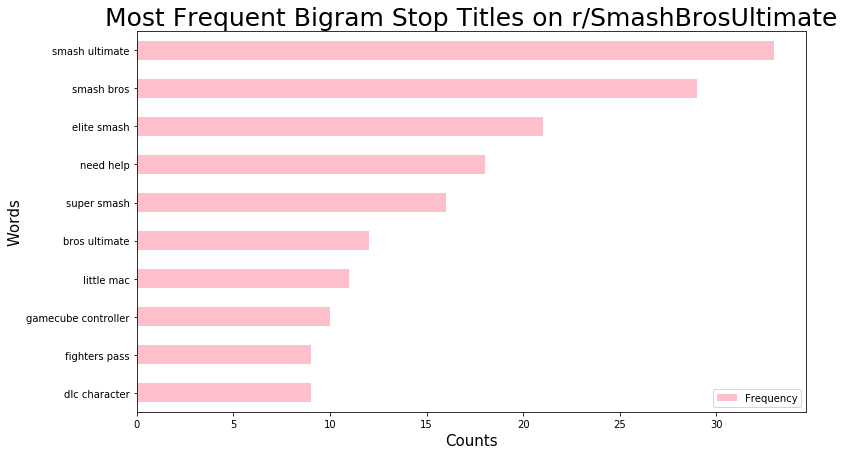

In [37]:
smash_stop_2_frequency = pd.DataFrame(data = stop_words_double(smash, 'title'), 
                                         columns = ['Frequency'])

top_10_stop = smash_stop_2_frequency.head(10)

top_10_stop.sort_values(by = 'Frequency', ascending = True).plot(kind = 'barh', 
                                                                  color = 'pink', 
                                                                  figsize = (12,7))

plt.title('Most Frequent Bigram Stop Titles on r/SmashBrosUltimate',size = 25)
plt.xlabel('Counts', size = 15)
plt.ylabel('Words', size = 15)

### Modeling 

#### Combining Data Frames

In [38]:
combined_df = pd.concat(objs = [mario_kart, smash], axis = 0)
combined_df = combined_df.drop(columns = 'selftext')

In [39]:
combined_df['subreddit'] = combined_df['subreddit'].map({'mariokart': 0, 'SmashBrosUltimate': 1})

In [40]:
combined_df.reset_index(drop = True, inplace = True)

In [41]:
combined_df

,title,subreddit
0,Time Trial issues,0
1,Time Trial [MK8DX],0
2,Is my build awful? (MK8DX),0
3,mario kart maker,0
4,Research for a YouTube video I’m working on.,0
...,...,...
3304,Need help against DK and KRool.,1
3305,Practicing with Level 1 CPUs,1
3306,Gambling coins in smash,1
3307,Toon Link: Possible revisions,1


#### Creating Our Variables 

In [42]:
X = combined_df['title']
y = combined_df['subreddit']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

#### Baseline

In [44]:
y.value_counts(normalize = True)

0    0.560895
1    0.439105
Name: subreddit, dtype: float64

#### Naive Bayes

In [45]:
tvec = TfidfVectorizer()
new_X_train = tvec.fit_transform(X_train).toarray()
new_X_test = tvec.transform(X_test).toarray()

#### Bernoulli Naive Bayes

In [46]:
bnb = BernoulliNB()
bnb.fit(new_X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [47]:
print(f'Training Score: {bnb.score(new_X_train, y_train)}')
print(f'Testing Score: {bnb.score(new_X_test, y_test)}')

Training Score: 0.9669488109633212
Testing Score: 0.8997584541062802


#### Bernoulli NB Confusion Matrix

In [48]:
y_test_preds = bnb.predict(new_X_test)

cm = confusion_matrix(y_test, y_test_preds)

cm_df = pd.DataFrame(cm, 
                     columns = ['Predicted Mario Kart', 'Predicted Smash Bros Ultimate'], 
                     index = ['Actual Mario Kart', 'Actual Smash Bros Ultimate'])
cm_df

,Predicted Mario Kart,Predicted Smash Bros Ultimate
Actual Mario Kart,423,41
Actual Smash Bros Ultimate,42,322


#### Multinomial Naive Bayes

In [49]:
mnb = MultinomialNB()
mnb.fit(new_X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
print(f'Training Score: {mnb.score(new_X_train, y_train)}')
print(f'Testing Score: {mnb.score(new_X_test, y_test)}')

Training Score: 0.954856912535268
Testing Score: 0.8454106280193237


#### Multinomial NB Confusion Matrix

In [51]:
y_test_preds = mnb.predict(new_X_test)

cm = confusion_matrix(y_test, y_test_preds)

cm_df = pd.DataFrame(cm, 
                     columns = ['Predicted Mario Kart', 'Predicted Smash Bros Ultimate'], 
                     index = ['Actual Mario Kart', 'Actual Smash Bros Ultimate'])
cm_df

,Predicted Mario Kart,Predicted Smash Bros Ultimate
Actual Mario Kart,439,25
Actual Smash Bros Ultimate,103,261


#### Classifiers

#### Logistic Regression

In [52]:
log = LogisticRegression()
log.fit(new_X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
print(f'Training Score: {log.score(new_X_train, y_train)}')
print(f'Testing Score: {log.score(new_X_test, y_test)}')

Training Score: 0.9693671906489318
Testing Score: 0.9057971014492754


#### Logistic Regression Confusion Matrix

In [54]:
y_test_preds = log.predict(new_X_test)

cm = confusion_matrix(y_test, y_test_preds)

cm_df = pd.DataFrame(cm, 
                     columns = ['Predicted Mario Kart', 'Predicted Smash Bros Ultimate'], 
                     index = ['Actual Mario Kart', 'Actual Smash Bros Ultimate'])
cm_df

,Predicted Mario Kart,Predicted Smash Bros Ultimate
Actual Mario Kart,399,65
Actual Smash Bros Ultimate,13,351


#### AdaBoost

In [55]:
ada = AdaBoostClassifier()
ada.fit(new_X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [56]:
print(f'Training Score: {ada.score(new_X_train, y_train)}')
print(f'Testing Score: {ada.score(new_X_test, y_test)}')

Training Score: 0.9201934703748489
Testing Score: 0.893719806763285


#### AdaBoost Confusion Matrix

In [57]:
y_test_preds = ada.predict(new_X_test)

cm = confusion_matrix(y_test, y_test_preds)

cm_df = pd.DataFrame(cm, 
                     columns = ['Predicted Mario Kart', 'Predicted Smash Bros Ultimate'], 
                     index = ['Actual Mario Kart', 'Actual Smash Bros Ultimate'])
cm_df

,Predicted Mario Kart,Predicted Smash Bros Ultimate
Actual Mario Kart,385,79
Actual Smash Bros Ultimate,9,355


#### Determining Our Best Model

In [58]:
pipe_params = {
    'tfidf__ngram_range' : [(1,1), (1,2)],
    'tfidf__stop_words' : [None, 'english']
}

In [59]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('bnb', BernoulliNB())
])

gs = GridSearchCV(pipe, pipe_params, cv = 5)
gs.fit(X_train, y_train);
model_1 = gs.best_estimator_

In [60]:
pipe2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

gs = GridSearchCV(pipe2, pipe_params, cv = 5)
gs.fit(X_train, y_train);
model_2 = gs.best_estimator_

In [61]:
pipe3 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('log', LogisticRegression())
])

gs = GridSearchCV(pipe3, pipe_params, cv = 5)
gs.fit(X_train, y_train);
model_3 = gs.best_estimator_

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

In [62]:
pipe4 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('ada', AdaBoostClassifier())
])

gs = GridSearchCV(pipe4, pipe_params, cv = 5)
gs.fit(X_train, y_train);
model_4 = gs.best_estimator_

#### Comparing Model Scores

In [63]:
print(f'Model 1 Training Score: {model_1.score(X_train, y_train)}')
print(f'Model 1 Testing Score: {model_1.score(X_test, y_test)}')
print('-------------------------------------------')
print(f'Model 2 Training Score: {model_2.score(X_train, y_train)}')
print(f'Model 2 Testing Score: {model_2.score(X_test, y_test)}')
print('-------------------------------------------')
print(f'Model 3 Training Score: {model_3.score(X_train, y_train)}')
print(f'Model 3 Testing Score: {model_3.score(X_test, y_test)}')
print('-------------------------------------------')
print(f'Model 4 Training Score: {model_4.score(X_train, y_train)}')
print(f'Model 4 Testing Score: {model_4.score(X_test, y_test)}')

Model 1 Training Score: 0.9701733172108021
Model 1 Testing Score: 0.9130434782608695
-------------------------------------------
Model 2 Training Score: 0.9609028617492946
Model 2 Testing Score: 0.8599033816425121
-------------------------------------------
Model 3 Training Score: 0.9693671906489318
Model 3 Testing Score: 0.9118357487922706
-------------------------------------------
Model 4 Training Score: 0.9214026602176542
Model 4 Testing Score: 0.8997584541062802


In [68]:
pipe4 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('ada', AdaBoostClassifier())
])

gs = GridSearchCV(pipe4, pipe_params, cv = 5)
gs.fit(X_train, y_train);
gs.best_estimator_

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('ada',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=1.0, n_estimat

#### Comparing Model Confusion Matrices

In [64]:
y_test_preds = model_1.predict(X_test)

cm = confusion_matrix(y_test, y_test_preds)

cm_df = pd.DataFrame(cm, 
                     columns = ['Predicted Mario Kart', 'Predicted Smash Bros Ultimate'], 
                     index = ['Actual Mario Kart', 'Actual Smash Bros Ultimate'])
cm_df

,Predicted Mario Kart,Predicted Smash Bros Ultimate
Actual Mario Kart,424,40
Actual Smash Bros Ultimate,32,332


In [65]:
y_test_preds = model_2.predict(X_test)

cm = confusion_matrix(y_test, y_test_preds)

cm_df = pd.DataFrame(cm, 
                     columns = ['Predicted Mario Kart', 'Predicted Smash Bros Ultimate'], 
                     index = ['Actual Mario Kart', 'Actual Smash Bros Ultimate'])
cm_df

,Predicted Mario Kart,Predicted Smash Bros Ultimate
Actual Mario Kart,439,25
Actual Smash Bros Ultimate,91,273


In [66]:
y_test_preds = model_3.predict(X_test)

cm = confusion_matrix(y_test, y_test_preds)

cm_df = pd.DataFrame(cm, 
                     columns = ['Predicted Mario Kart', 'Predicted Smash Bros Ultimate'], 
                     index = ['Actual Mario Kart', 'Actual Smash Bros Ultimate'])
cm_df

,Predicted Mario Kart,Predicted Smash Bros Ultimate
Actual Mario Kart,401,63
Actual Smash Bros Ultimate,10,354


In [67]:
y_test_preds = model_4.predict(X_test)

cm = confusion_matrix(y_test, y_test_preds)

cm_df = pd.DataFrame(cm, 
                     columns = ['Predicted Mario Kart', 'Predicted Smash Bros Ultimate'], 
                     index = ['Actual Mario Kart', 'Actual Smash Bros Ultimate'])
cm_df

,Predicted Mario Kart,Predicted Smash Bros Ultimate
Actual Mario Kart,388,76
Actual Smash Bros Ultimate,7,357


### Outside Research
What is Reddit? Reddit is home to thousands of communities, endless conversation, an authentic human connection. Whether you're into breaking news, sports, TV fan theories, or a never-ending stream of the internet's cutest animals, there's a community on Reddit for you. 

How does Reddit Work? Every day, millions of people around the world post, vote, and comment in communities organized around their interests. 
- Post: The community can share content by posting stories, links, images, and videos.
- Comment: The community comments on posts. Comments provide discussion and often humor. 
- Vote: Comments & posts can be upvoted or downvoted. The most interesting content rises to the top. 

**Mario Kart Subreddit**

> About Community: 
- 63.7k racers
- Created on January 12, 2011

Subreddit Rules: 
1. No unsourced artwork
2. No low-quality posts 
3. No unapproved self-advertisements
4. No NSFW posts

Filters: 
- Discussion
- Meta
- Humor 
- Replay/Clip
- News/Article
- Competitive
- Fan Content
- Achievement 

There are many rules for the Mario Kart subreddit where the general basis is to post PG quality related posts. As we can see, there are numerous filters so there isn't a very consistent discussion going on as it spreads across various topics. 

**Smash Bros Ultimate Subreddit**

> About Community: 
- 292k returning veterans
- Created on June 12, 2018

Subreddit Rules: 
1. Be excellent to one another
2. No low-effort/misleading posts
3. No off topic posts
4. Keep it clean
5. No advertising or self-promotion
6. Mark spoilers
7. No reposts
8. No stolen content

Filters: 
- Meme/Funny
- Image/Gif
- Video
- Fan Made
- Speculation
- Official News

Unlike the Mario Kart subreddit, the Smash Bros Ultimate subreddit has many more rules to help steer discussions or posts in a specific direction. As a result, there are also fewer filters, especially considering the fact that there is over 3 times the number of Reddit users in the community. It shows that there is a high amount of consistency across posts. 

### Conclusion and Recommendations
After exploring a few different models and tuning those models by playing with the hyperparameters, we discovered that our Tuned AdaBoost model is ideal in differentiating titles into the correct reddit as it is 92.14% accurate in classifying our training set and 89.98% accurate in classifying our testing set. As shown in the table below, we can see all the training and testing model accuracy scores. While our Tuned AdaBoost model doesn't necessarily have the highest scores, we care more about the two scores being as close together as possible because it shows that our model isn't overfit to our training data. For instance, if we look at the Multinomial NB model, the training score is quite high with a 95.49% accuracy, but the testing score is nearly 10 points lower at 84.54% accuracy, which means that this model is very overfit to the training data set and doesn't do well in classifying new titles into the correct subreddit. Overall, our Tuned AdaBoost model still does fairly well considering that it managed to predict 90% of our titles to the correct subreddit out of a sample of over 3000 rows (which means that it was inaccurate on about 300 rows). 

|Model|Training Score|Testing Score|
|---|---|---|
|Bernoulli NB|0.9669|0.8998|
|Multinomial NB|0.9549|0.8454|
|Logistic Regression|0.9694|0.9058|
|AdaBoost Classifier|0.9202|0.8937|
|Bernoulli NB Tuned|0.9702|0.9130|
|Multinomial NB Tuned|0.9609|0.8599|
|Logistic Regression Tuned|0.9694|0.9118|
|AdaBoost Classifier Tuned|0.9214|0.8998|

However, we do need to consider that this is still a relatively "surface level" model so there are downfalls to this model. Primarily, our model is only catered to two specific subreddits: Mario Kart and Smash Bros Ultimate. Therefore, we can't apply this model to other subreddits such as Mario Party or Super Mario Bros unless we make some modifications. In addition, we could also tune our hyperparameters further as we are only exploring four hyperparameters out of a myriad of possible combinations that could increase our model's accuracy so it can learn more and be capable of thinking more like a human. Furthermore, this data is also time based as recommendations made today may not be the same a year from now as these subreddits are constantly growing and topics may change. 

Overall, we suggest that Nintendo market their new Mario Kart game as essentially the title. For example, if the game is going to be called "Mario Kart Global" then our recommended hashtag is "#mariokartglobal" as the most common words we discovered in the Mario Kart subreddit to be "kart" (when looking at a single word option) or "mario kart" (when looking at a consecutive two word option). Building off of the consecutive two word option, the next couple most common word combinations are: "kart tour" and "kart deluxe" which refer to the latest, Mario Kart Tour, and Mario Kart Deluxe 8, respectively. Additionally, we recommend refraining from including numbers in the hashtag based on the sole foundation of what we discovered from Mario Kart 8 Deluxe being referred to as "mario kart deluxe" instead of "mario kart 8." 